<div class="alert alert-info">
 <center> Сборный проект№1 </center> 
    
 
 </div>

<div class="alert alert-info">
<b> У нас есть данный  о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<br>Данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.</br>
    
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
</b> 
<center> Цели: </center> 
<br>  1. Открыть файл с данными и изучить общую информацию</br> 
<br>  2. Подготовка данные</br>
<br>  3. Исследовательский анализ данных</br>
<br>  4. Портрет пользователя каждого региона</br> 
<br>  5. Проверка гипотезы</br>
<br>  6. Общий вывод</br>
<center> Описание данных: </center> 

<br>Name — название игры</br> 
<br> Platform — платформа</br> 
<br> Year_of_Release — год выпуска</br> 
<br> Genre — жанр игры</br> 
<br> NA_sales — продажи в Северной Америке (миллионы проданных копий)</br> 
<br> EU_sales — продажи в Европе (миллионы проданных копий)</br>  
<br> JP_sales — продажи в Японии (миллионы проданных копий)</br> 
<br> Other_sales — продажи в других странах (миллионы проданных копий)</br> 
<br> Critic_Score — оценка критиков (максимум 100)</br> 
<br> User_Score — оценка пользователей (максимум 10)</br> 
<br> Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг  компьютерных игр и присваивает им подходящую возрастную категорию.</br> 


</div>

In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
from scipy import stats as st
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import math


In [12]:
data = pd.read_csv('C:\Jupiter/games.csv')

<div class="alert alert-info">
    
<b> Откроем csv файл и подгрузим библиотеки с которыми будем работать по ходу проекта</b> 
</div>

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-info">
<b> Заменим названия столбцом</b> 
</div>

In [14]:
data.columns = map(str.lower, data.columns)

In [15]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<div class="alert alert-info">
В name 2 пропуска, их просто удалим чтобы не мешали. На общую картину это не повлияет. Заменит тип данных в year_of_release на интерджер(смысл года в флоат оставлять не вижу) для это нужно убрать пропусти.  Заменим их медианным значением, чтобы не терять часть данных в какие года что выходило.
    
Так же заполним  пропуски в data['name'] и genre на пустые значения</b> 


In [16]:
data['year_of_release'] = data['year_of_release'].fillna(0).astype(int)
data['name']= data['name'].fillna("")
data['genre']= data['genre'].fillna("")

<div class="alert alert-info">
<b> Округлим данные по продажам и переведем их в интеджер, смысла от флоат тут не вижу, да и не понимаю(0.5 продажи это как вообще? хех)
    
Заменим tbd на 0(это значит что человек еще не поставил оценку, а только собирался. Значит этих данных нет, чтобы они нам не мешали заменим их 0м) тоже самое можно сказать и о пропусках в user_score, далее все расчеты и графики будем стоить от 1 и выше чтобы не путать данные) тоже самое сделаем с пропусками в rating и critic_score
    
    
user_score  заполним пропуски нулями чтобы не терять часть данных и при этом можно было бы перевести их в интеджер
    
так же замени пропуски в rating на unknown чтобы видеть в каких регионах рейтинг не ставят и покупают без него
</b> 
</div>

In [17]:
data['na_sales'] = data['na_sales'].round().astype(int)
data['eu_sales'] = data['eu_sales'].round().astype(int)
data['jp_sales'] = data['jp_sales'].round().astype(int)
data['other_sales'] = data['other_sales'].round().astype(int)

data['user_score'] = data['user_score'].replace(["tbd", "0"], '0', regex=True)
data['user_score'] = data['user_score'].fillna(0)
data['user_score'] = pd.to_numeric(data['user_score'])
data['user_score'] = data['user_score'].round().astype(int)
print(data['user_score'].unique())

data['rating'] = data['rating'].fillna('unknown')

[ 8  0  7  9  6  3  5  4  2 10  1]


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int32
genre              16715 non-null object
na_sales           16715 non-null int32
eu_sales           16715 non-null int32
jp_sales           16715 non-null int32
other_sales        16715 non-null int32
critic_score       8137 non-null float64
user_score         16715 non-null int32
rating             16715 non-null object
dtypes: float64(1), int32(6), object(4)
memory usage: 1.0+ MB


<div class="alert alert-info">
<b> Создадим и посчитаем продажи в новом столбце
   </b> 
</div>

In [19]:
data['all_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
print(data['all_sales'].head(10))

0    82
1    41
2    36
3    33
4    31
5    30
6    29
7    29
8    28
9    28
Name: all_sales, dtype: int32


<div class="alert alert-info">
<b> посмотреть количество выпускаемых игр по годам мы не можем, нет данных будем считать что количество продаж соответвует количесву выпущен игр. Cтроим график всех продаж по годам. Лидерами являются 2007 и 2008 год

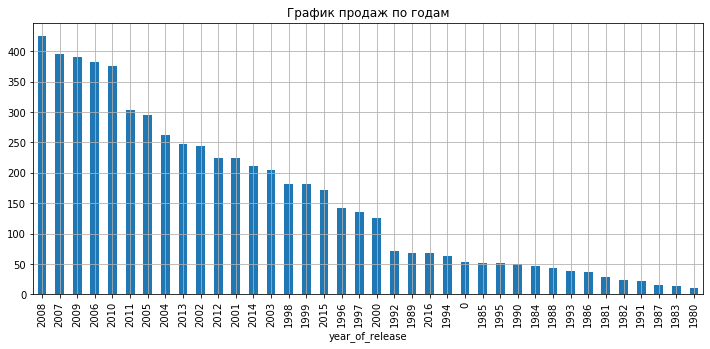

In [20]:
data_saint = data.groupby('year_of_release')['all_sales'].sum().sort_values(ascending=False)

data_saint.plot(x='year_of_release', y='all_sales',  figsize=(12,5), kind='bar', grid=True, title='График продаж по годам');
plt.show()

Смотрим, как менялись продажи по платформам

In [21]:
data_top = data.pivot_table(index = 'platform', values = 'all_sales',  aggfunc=['sum']).reset_index(level='platform')
data_top.columns = ['платформа', 'всего продаж']
data_topp = data_top.sort_values(by='всего продаж', ascending=False)
print(data_topp.head(10))

   платформа  всего продаж
16       PS2           801
28      X360           705
26       Wii           656
17       PS3           599
4         DS           505
15        PS           459
5         GB           243
11       NES           233
18       PS4           229
13        PC           173


<div class="alert alert-info">
<b> Стоим график топ 5 платформ исходя из обьема продаж. Пики их продаж в среднем 3-5 лет, но все стремятся к нулю после 2015, продаж уже почти не было. Скорее всего это связанно с тем, что было новая платформа которая забрала всех клиентов
   </b> 
</div>

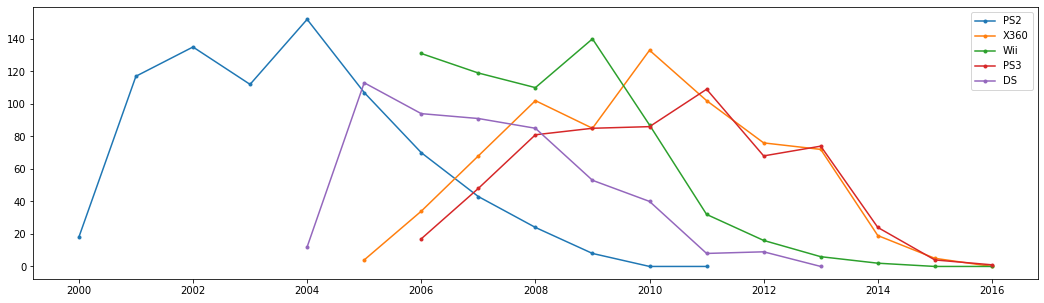

In [22]:
top_5_pl = ['PS2', 'X360', 'Wii', 'PS3', 'DS']
data_query = data.query('year_of_release >= 2000')
fig, ax = plt.subplots(1, 1, figsize = (18,5))

for top_5_pl in top_5_pl:
    data_pl = data_query[data_query['platform'] == top_5_pl]
    data_group = data_pl.groupby('year_of_release')['all_sales'].sum().reset_index()
    data_group.columns = ['year_of_release', 'sum']
    x =  data_group['year_of_release']
    y =  data_group['sum'] 
    ax.plot(x,y,   marker =".", label = top_5_pl)
plt.legend()
plt.show()

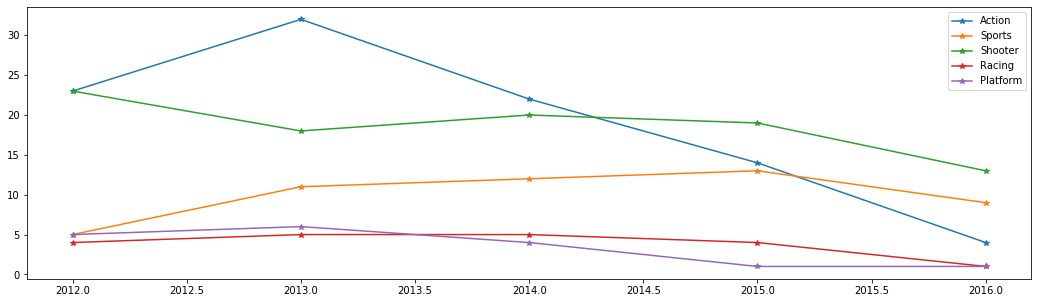

In [23]:
data_eu_sales = ['Action', 'Sports', 'Shooter', 'Racing', 'Platform']
data_query = data.query('year_of_release >= 2012')
fig, ax = plt.subplots(1, 1, figsize = (18,5))

for data_eu_sales in data_eu_sales:
    data_pl = data_query[data_query['genre'] == data_eu_sales]
    data_group = data_pl.groupby('year_of_release')['eu_sales'].sum().reset_index()
    data_group.columns = ['year_of_release', 'sum']
    x =  data_group['year_of_release']
    y =  data_group['sum'] 
    ax.plot(x,y,   marker ="*", label = data_eu_sales)
plt.legend()
plt.show()

<div class="alert alert-info">
возьмем топ 5 платформ после 2012 года по продажам. Потенцеально прибильные PS4, это хорошо видно на грфике так же х360, рс3, 3DS, XOne. у всех у них падают продажи и если выбирать среди них самую прибыльную это рс4, но тоже в перспиктиву пары лет, видими все так есть другая платфаорма куда они все уходят.

In [24]:
data_top = data_query.pivot_table(index = 'platform', values = 'all_sales',  aggfunc=['sum']).reset_index(level='platform')
data_top.columns = ['платформа', 'всего продаж']
data_topp = data_top.sort_values(by='всего продаж', ascending=False)
print(data_topp.head(5))

   платформа  всего продаж
4        PS4           229
9       X360           172
3        PS3           171
0        3DS           128
10      XOne           108


<div class="alert alert-info">
постоим ящик с усами. убедимся в наших топ 5

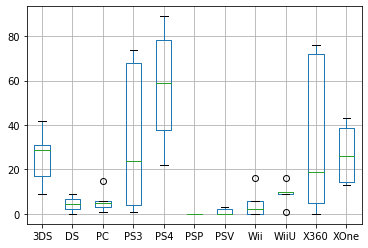

In [25]:
data_query.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum').boxplot()

  <div class="alert alert-info">
<b> Выберем самую популярную платформу РS4 и и посмотрим как влияют продажи внутри одной популярной платформы отзывы пользователей и критиков. Можно заметить, что продажи и отзывы есть небольшя зависимоть корреляция 0.37 значит что 37 процентов продаж зависили тот отзывов. 
   
   </b> 
</div>

              all_sales  critic_score  user_score
all_sales      1.000000      0.375348   -0.053025
critic_score   0.375348      1.000000    0.540359
user_score    -0.053025      0.540359    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001721E7B4948>,
      dtype=object)

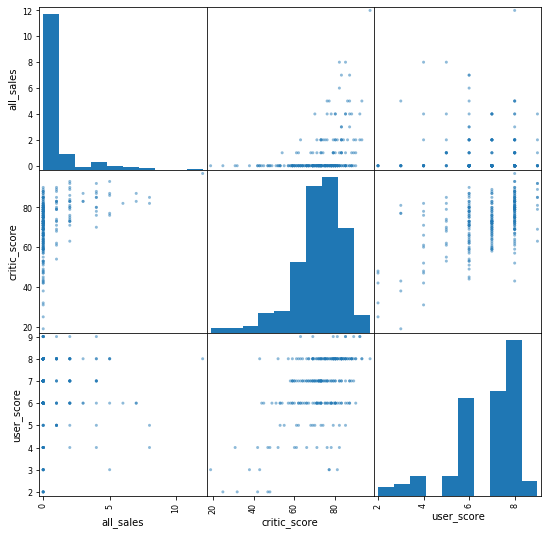

In [26]:
data_corr = data_query.query('platform == "PS4"')
data_corr = data_corr.query('user_score >= 1')

station_stat_multi = data_corr.pivot_table(index='name', values=['critic_score', 'user_score', 'all_sales'], aggfunc='median')
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi, figsize=(9, 9))

<div class="alert alert-info">
Постоим подобные графики и выявление корреляции по другим платформам и посмтим на результат. У платформы X360 схожая зависимость коррелиции и отзывов близка к 0.37. Можно сказать, что эта платформа тоже зависит от отзывов.

              all_sales  critic_score  user_score
all_sales      1.000000      0.335784    0.009762
critic_score   0.335784      1.000000    0.556430
user_score     0.009762      0.556430    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001721E000D88>,
      dtype=object)

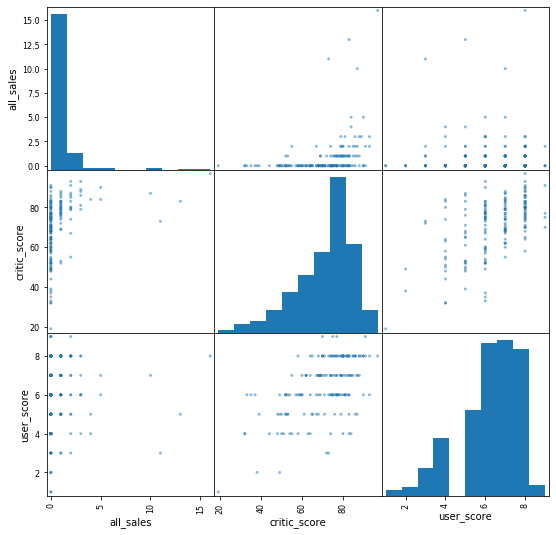

In [27]:
data_cor = data_query.query('platform == "X360"')
data_cor = data_cor.query('user_score >= 1')

station_stat_multi = data_cor.pivot_table(index='name', values=['critic_score', 'user_score', 'all_sales'], aggfunc='median')
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi, figsize=(9, 9))

<div class="alert alert-info">
У платформы PS3 схожая зависимость коррелиции и отзывов близка к 0.37. Можно сказать, что эта платформа тоже зависит от отзывов. Так же наблюдается интересная тенденция к продажам. У лидера зависимость больше. Сейчас мы смотрим топ3 и явно идет спад коррелиции, можно сказать, что отзывы напрямую зависят от продаж

              all_sales  critic_score  user_score
all_sales      1.000000      0.299690   -0.037745
critic_score   0.299690      1.000000    0.534957
user_score    -0.037745      0.534957    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001721F0B7BC8>,
      dtype=object)

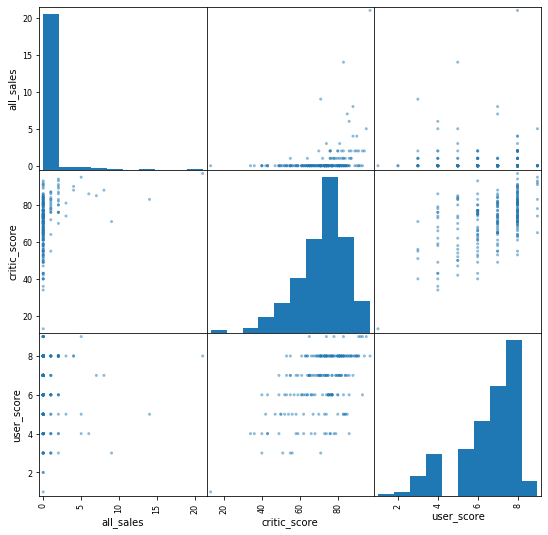

In [28]:
data_cor = data_query.query('platform == "PS3"')
data_cor = data_cor.query('user_score >= 1')

station_stat_multi = data_cor.pivot_table(index='name', values=['critic_score', 'user_score', 'all_sales'], aggfunc='median')
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi, figsize=(9, 9))

  <div class="alert alert-info">
<b> У платформы 3DS схожая зависимость коррелиции и отзывов близка к 0.37. И я бы сказал что эта платформа в будущем может стать номер один по продажам исходя из корреляции по отзывам. В сумме ее корреляция от отзывам 0.42(критиков и пользователей) что является самой большой среди тех которые исследовали. Если выбирать Сриди пратформ какая в будущем вышла бы в топ по продажам можно сказать, что эта платформа была бы лидером.
   </b> 
</div>

              all_sales  critic_score  user_score
all_sales       1.00000      0.259290    0.170370
critic_score    0.25929      1.000000    0.713127
user_score      0.17037      0.713127    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001721F546548>,
      dtype=object)

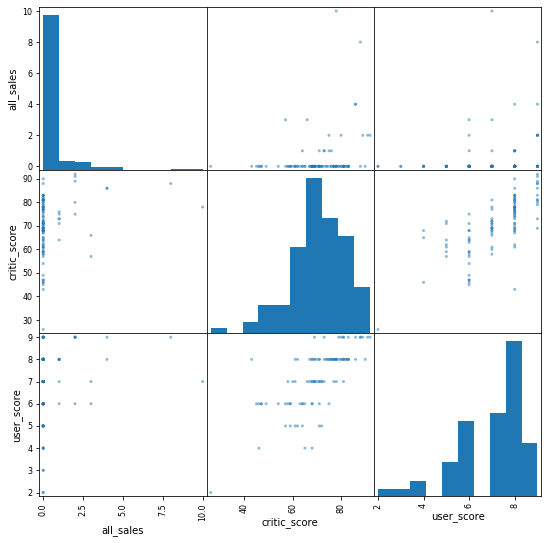

In [29]:
data_cor = data_query.query('platform == "3DS"')
data_cor = data_cor.query('user_score >= 1')

station_stat_multi = data_cor.pivot_table(index='name', values=['critic_score', 'user_score', 'all_sales'], aggfunc='median')
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi, figsize=(9, 9))

<div class="alert alert-info">
<b> Самые прибыльный жанр это  shooter. Полсе Платформ и спорт потом все остальные.
   </b> 
</div>

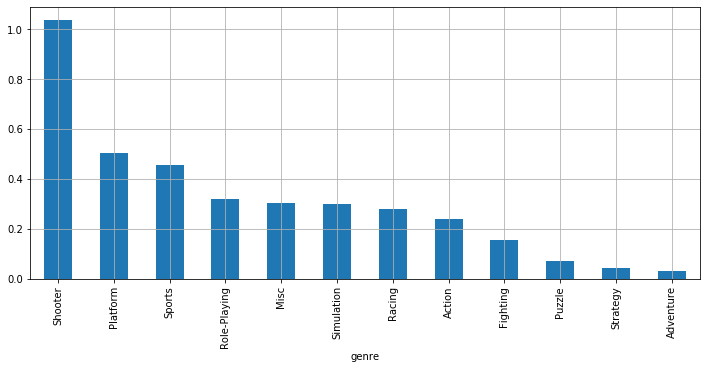

In [30]:
data_genre = data_query.groupby('genre')['all_sales'].mean().sort_values(ascending=False)
data_genre.plot(x='genre', y='all_sales',  figsize=(12,5), kind='bar', grid=True);
plt.show()

<div class="alert alert-info">
Составим портрет пользователя каждого региона Самые популярные платформы (топ-5)

Лидирующая платформа у каждого региона своя. у Северной Америки лидер X360 у Японии 3DS(хотя в Сев. Америке она на 5м месте) в Евпропе же лидер PS4, в Америке он на 2м месте, а в Японии и вовсе отсутсвует.

In [31]:
data_na_sales = data_query.pivot_table(index = 'platform', values = 'na_sales',  aggfunc=['sum']).reset_index(level='platform')
data_na_sales.columns = ['платформа', 'всего продаж']
data_topp = data_na_sales.sort_values(by='всего продаж', ascending=False)
print(data_topp.head(5))

data_jp_sales = data_query.pivot_table(index = 'platform', values = 'jp_sales',  aggfunc=['sum']).reset_index(level='platform')
data_jp_sales.columns = ['платформа', 'всего продаж']
data_topp = data_jp_sales.sort_values(by='всего продаж', ascending=False)
print(data_topp.head(5))

data_eu_sales = data_query.pivot_table(index = 'platform', values = 'eu_sales',  aggfunc=['sum']).reset_index(level='platform')
data_eu_sales.columns = ['платформа', 'всего продаж']
data_topp = data_eu_sales.sort_values(by='всего продаж', ascending=False)
print(data_topp.head(5))

   платформа  всего продаж
9       X360           120
4        PS4            85
10      XOne            73
3        PS3            71
0        3DS            39
  платформа  всего продаж
0       3DS            59
3       PS3             7
8      WiiU             7
1        DS             3
7       Wii             3
   платформа  всего продаж
4        PS4           116
3        PS3            75
9       X360            46
10      XOne            34
0        3DS            27


  <div class="alert alert-info">
В Америке самый популярный жарн шутер, потом Action, в Японии Role-Playing самый популярный. В Евпропе примерно как и в Америке Action потом шутер. Думаж жанры в которые играют в Японии так отличаются от других стан потому что выборка не досточна большая, может у них свои ценности и взгляды на жизнь не знаю)) хотя на втором месте у них так же Action

In [32]:
data_na_sales = data_query.pivot_table(index = 'genre', values = 'na_sales',  aggfunc=['sum']).reset_index(level='genre')
data_na_sales.columns = ['жанр', 'всего продаж']
data_topp = data_na_sales.sort_values(by='всего продаж', ascending=False)
print(data_topp.head(5))

data_jp_sales = data_query.pivot_table(index = 'genre', values = 'jp_sales',  aggfunc=['sum']).reset_index(level='genre')
data_jp_sales.columns = ['жанр', 'всего продаж']
data_topp = data_jp_sales.sort_values(by='всего продаж', ascending=False)
print(data_topp.head(5))

data_eu_sales = data_query.pivot_table(index = 'genre', values = 'eu_sales',  aggfunc=['sum']).reset_index(level='genre')
data_eu_sales.columns = ['жанр', 'всего продаж']
data_topp = data_eu_sales.sort_values(by='всего продаж', ascending=False)
print(data_topp.head(5))

            жанр  всего продаж
8        Shooter           127
0         Action           122
10        Sports            65
7   Role-Playing            48
3           Misc            29
           жанр  всего продаж
7  Role-Playing            37
0        Action            13
9    Simulation             8
3          Misc             6
4      Platform             6
            жанр  всего продаж
0         Action            95
8        Shooter            93
10        Sports            50
7   Role-Playing            29
3           Misc            19


  <div class="alert alert-info">
График популярный жанров в Японии.

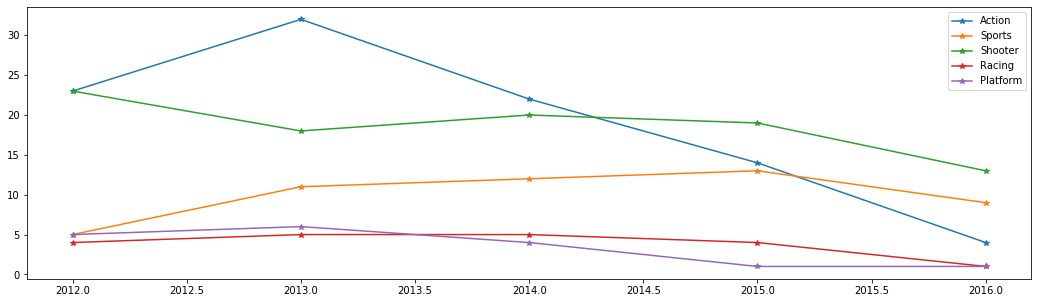

In [33]:
data_eu_sales = ['Action', 'Sports', 'Shooter', 'Racing', 'Platform']
data_query = data.query('year_of_release >= 2012')
fig, ax = plt.subplots(1, 1, figsize = (18,5))

for data_eu_sales in data_eu_sales:
    data_pl = data_query[data_query['genre'] == data_eu_sales]
    data_group = data_pl.groupby('year_of_release')['eu_sales'].sum().reset_index()
    data_group.columns = ['year_of_release', 'sum']
    x =  data_group['year_of_release']
    y =  data_group['sum'] 
    ax.plot(x,y,   marker ="*", label = data_eu_sales)
plt.legend()
plt.show()

  <div class="alert alert-info">
Посмотрим как рейтинг влиял на продажи по регионам с помощью круговых диаграм. В Америке 44 процента игр это с рейтингом М(для взрослых)
В Японии этим рейтингом особо не пользовались, а те кто пользовались предпочитали игры с рейтингом Е(для всех) тут сложно судить из-за того что данных мало

В Европе 44 процента игр это с рейтингом М(для взрослых) совпадение с Америкой. У них много чего свопадает хех

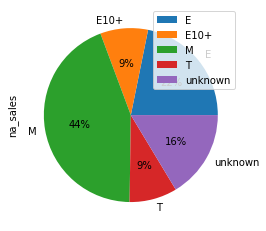

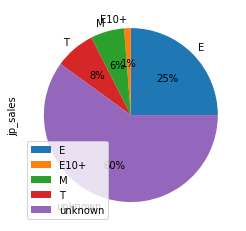

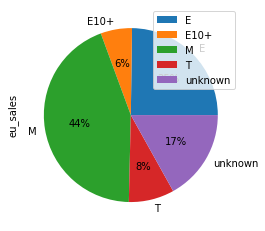

In [34]:
data_query.groupby(['rating']).sum().plot(
    kind='pie', y='na_sales', autopct='%1.0f%%') 

data_query.groupby(['rating']).sum().plot(
    kind='pie', y='jp_sales', autopct='%1.0f%%', )

data_query.groupby(['rating']).sum().plot(
    kind='pie', y='eu_sales', autopct='%1.0f%%', )

<div class="alert alert-info">
Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Альтернативаня гипотеза:Средние пользовательские рейтинги платформ Xbox One и PC разные

Так как стоит задача сравнить средние значеия двух независивых совокупностей, для проведния эксперимета будем использовать независимый двухвыброчнй t-критерий, который и предназначен для этого. Так как задача стоит ответить на вопрос о равенстве средних, а не о том, больше ли, или меньше одно из них, альтернативную гипотезу изложим как двухсторонюю.


Статистический вывод: на имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы.
Средние пользовательские рейтинги жанров Action и Sports разные
Проверяем гипотезу строгим математическим правилом — статистическим критерием Стьюдента.


В результате получаем величину p-value. Она лежит в диапазоне от 0 до 1 и означает вероятность увидеть текущую или более экстремальную разницу между группами при условии верности нулевой гипотезы.


Значение p-value сравнивается с уровнем значимости 0.05. Если оно больше, принимаем нулевую гипотезу о том, что различий нет, иначе считаем, что между группами есть статистически значимая разница.
Исходя из обьема данных и выборки с которой мы работает возьмем уровень значимости(доверия) 5%.


Вывод делается на выборке с 2012 года по 2016 год


Вывод:Не получилось отвергнуть нулевую гипотезу

In [35]:
games_clean = data_query.dropna(subset=['user_score'])
xbox_one = games_clean.query('platform == "XOne"')['user_score']
pc = games_clean.query('platform == "pc"')['user_score']

results = st.ttest_ind(xbox_one, pc, equal_var= False)
 
alpha = 0.05

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info">
Так как стоит задача сравнить средние значеия двух независивых совокупностей, для проведния эксперимета будем использовать независимый двухвыброчнй t-критерий, который и предназначен для этого. Так как задача стоит ответить на вопрос о равенстве средних, а не о том, больше ли, или меньше одно из них, альтернативную гипотезу изложим как двухсторонюю.

<div class="alert alert-info">
Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые
Альтернативаня гипотеза:Средние пользовательские рейтинги жанров Action и Sports разные

Так как стоит задача сравнить средние значеия двух независивых совокупностей, для проведния эксперимета будем использовать независимый двухвыброчнй t-критерий, который и предназначен для этого. Так как задача стоит ответить на вопрос о равенстве средних, а не о том, больше ли, или меньше одно из них, альтернативную гипотезу изложим как двухсторонюю.


Статистический вывод: на имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы.
Средние пользовательские рейтинги жанров Action и Sports разные


Проверяем гипотезу строгим математическим правилом — статистическим критерием Стьюдента.


В результате получаем величину p-value. Она лежит в диапазоне от 0 до 1 и означает вероятность увидеть текущую или более экстремальную разницу между группами при условии верности нулевой гипотезы.


Значение p-value сравнивается с уровнем значимости 0.05. Если оно больше, принимаем нулевую гипотезу о том, что различий нет, иначе считаем, что между группами есть статистически значимая разница.


Исходя из обьема данных и выборки с которой мы работает возьмем уровень значимости(доверия) 5%.


Вывод делается на выборке с 2012 года по 2016 год


Вывод:Не получилось отвергнуть нулевую гипотезу

In [36]:
games_clean = data_query.dropna(subset=['user_score'])
xbox_one = games_clean.query('genre == "Action"')['user_score']
pc = games_clean.query('genre == "Sports"')['user_score']

results = st.ttest_ind(xbox_one, pc, equal_var= False)
 
alpha = 0.05

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


<div class="alert alert-info">
Вывод:

В ходе работы были замечены следующие особенности:

1. Лидерами являются 2007 и 2008 год
2. 'PS2', 'X360', 'Wii', 'PS3', 'DS' являлись самыми популярными платформами
3. Самая популярную платформу РS4
4. У продаж и отзывывов есть небольшя зависимоть корреляция 0.37 значит что 37 процентов продаж зависили тот отзывов.
5. Самый прибыльный жанр это shooter
6. У Северной Америки платформа лидер X360
7. у Японии платформа лидер 3D
8. в Евпропе платформа лидер PS4
9. В Америке самый популярный жарн шутер, потом Action
10. В Японии Role-Playing самый популярный
11. В Евпропе примерно как и в Америке Action потом шутер. Думаж жанры в которые играют в Японии так отличаются от других стан потому что выборка не досточна большая, может у них свои ценности и взгляды на жизнь не знаю)) хотя на втором месте у них так же Action
12. В Америке 44 процента игр это с рейтингом М(для взрослых)
13. В Японии этим рейтингом особо не пользовались, а те кто пользовались предпочитали игры с рейтингом Е(для всех) тут сложно судить из-за того что данных мало
14. В Европе 44 процента игр это с рейтингом М(для взрослых) совпадение с Америкой. У них много чего свопадает хех
15. Между Европой и Америкой инресная зависимость между выбором жанром игры и рейтингом, почти одинаковые